# K-means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib notebook

## Data generation

Generate a toy data set of `n` samples.

Each data point should have 2 features. The data points are generated by drawing from `k` **2D** Gaussian distributions (the `k` "clusters") with the identity matrix as covariance matrix. Each cluster should (approximately) contain the same number of points.

The `k` centers of the clusters, i.e. the mean points of the Gaussian distribution, should be random integers in each dimension that are drawn from a uniform distribution in the range -10 to 10.

In [2]:
# Have a look at the documentation of numpy.random to find appropriate functions for this task.
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    ==================== =========================================================
    Utility functions
    random_sample        Uniformly distributed floats over ``[0, 1)``.
    random               Alias for `random_sample`.
    bytes                Uniformly distributed random bytes.
    random_integers      Uniformly distributed integers in a given range.
    permutation          Randomly permute a sequence / generate a random sequence.
    shuffle              Randomly permute a sequence in place.
    seed                 Seed the random number generator.
    choice               Random sample from 1-D array.
    
    ==================== =========================================================
    
    ==================== =========================================================
    Compatibility functions
    rand                 Uniformly distributed values.
    randn

In [3]:
def generate_data(n, k):
    """
    :param n: Number of samples.
    :param k: Number of clusters.
    :return X: The data points stored in a (n x 2) numpy.ndarray.
    :return centers: The cluster centers stored in a (k x 2) numpy.ndarray.
    """
    ### BEGIN SOLUTION
    clusters = list()
    centers = list()
    for i in range(k):
        center = np.random.randint(-10, 10, 2)
        c = np.random.multivariate_normal(center, np.eye(2), n // k)
        
        clusters.append(c)
        centers.append(center.reshape((1, -1)))
    X = np.concatenate(clusters, axis=0)
    centers = np.concatenate(centers, axis=0)
    ### END SOLUTION
    return X, centers
np.random.seed(42)  # Set the seed of the random number generator to be able to reproduce the results.

# Generate a dataset of 1000 samples and 4 clusters
X, true_centers = generate_data(1000, 4)
print(true_centers)

[[-4  9]
 [-5 -5]
 [ 7  1]
 [ 8  6]]


Plot the dataset in a scatter plot.

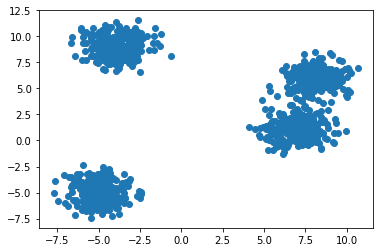

In [4]:
plt.figure()
### BEGIN SOLUTION
plt.scatter(*X.T)
### END SOLUTION
plt.show()

## Distances
Implement the L1, L2 and cosine distances between the arrays x and y.

In [5]:
# Implement distances using Numpy
def l1(x, y):
    ### BEGIN SOLUTION
    distance = np.sum(np.abs(x - y))
    ### END SOLUTION
    return distance
    
def l2(x, y):
    ### BEGIN SOLUTION
    distance = np.sqrt(np.sum((x - y) ** 2))
    ### END SOLUTION
    return distance
    
def cosine_distance(x, y):
    ### BEGIN SOLUTION
    distance = 1 - np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(x))
    ### END SOLUTION
    return distance

## Initialization
Initialize the cluster prototypes. The parameter `method` indicates how the initialization should be performed. Possible values are:
* `"random"`: Initialize randomly between 0 and 5 (integers from uniform distribution).
* `"sample"`: Randomly choose samples from the dataset as initialization. *Hint*: `sklearn.utils.shuffle` might be helpful.
* `"zero"`: Initialize all prototypes to (0, 0)
* If none of these above values is provided, raise an appropriate Exception.

In [6]:
def initialize(k, X, method="sample"):
    """
    :param k: Number of clusters.
    :param X: Dataset.
    :return M_init: The initial guess of the cluster centers as (k x 2) numpy.ndarray.
    """
    ### BEGIN SOLUTION
    if method == "random":
        M_init = np.array([np.random.randint(0, 5, 2) for i in range(k)])
    elif method == "sample":
        M_init = shuffle(X)[:k]
    elif method == "zero":
        M_init = np.zeros((k, 2))
    else:
        raise ValueError(f"Method {method} not understood.")
    ### END SOLUTION
    return M_init

## K-means Algorithm
Implement K-means. Stop the iteration if the estimated cluster do not change anymore (i.e. the sum of the change is less than `epsilon`) or the maximal number of iterations `max_iter` is reached. Use the function `distance` to compute the intra-class distances.

In [7]:
def kmeans(X, k, M_init, distance=l1, max_iter=100, epsilon=1e-2):
    """
    :param X: n x d data matrix
    :return M: k x 2 array of estimated cluster centers
    :return C: n x k binary array that defines the cluster memberships.
    """
    # Initialize codebook vectors
    ### BEGIN SOLUTION
    M = M_init
    ### END SOLUTION
    
    # Keep track of previous means to test convergence
    ### BEGIN SOLUTION
    M_prev = np.copy(M)
    ### END SOLUTION
    
    # Initialize cluster correspondences
    ### BEGIN SOLUTION
    C = np.zeros((X.shape[0], k))
    ### END SOLUTION
    
    # Algorithm
    ### BEGIN SOLUTION
    for t in range(max_iter):
        for i in range(X.shape[0]):
            D = np.array([distance(X[i], m) for m in M])
            idx_closest = np.argmin(D)
            m_closest = M[idx_closest]
            C[i] = np.zeros_like(C[i])
            C[i][idx_closest] = 1
        
        M = np.dot(C.T, X)
        M /= C.sum(axis=0).reshape((-1, 1))  # Sum over all samples
        
        # Test for convergence
        if np.sum(np.linalg.norm(M - M_prev, axis=1)) < epsilon:
            print(f"Converged after {t} iterations")
            break
        M_prev = np.copy(M)
    ### END SOLUTION
    return M, C

In [8]:
# Run an example
k = 4
M_init = initialize(k, X, method="sample")
print("Initial centers:")
print(M_init)
M, C = kmeans(X, k, M_init, max_iter=10)

print("\n")
print("Result:")
print(M)

print("\n")
print("True centers:")
print(true_centers)

Initial centers:
[[-2.08768236 10.06522708]
 [-3.74061069  9.30234829]
 [ 9.03823959  6.08636757]
 [ 5.19759109  0.35347048]]
Converged after 8 iterations


Result:
[[-3.09767492  9.29653178]
 [-4.71996819  8.96310309]
 [ 7.50479817  3.50582275]
 [-4.98766919 -4.94973183]]


True centers:
[[-4  9]
 [-5 -5]
 [ 7  1]
 [ 8  6]]


## Inspection

Plot the clustering result in a scatter plot. Samples belonging to the same cluster should have the same color. 

Furthermore, plot the initial guesses and the final estimates of the centroids. Use different markers to distinguish the from the samples in the scatter plot. To this end, have a look at the documentation of `plt.scatter`.

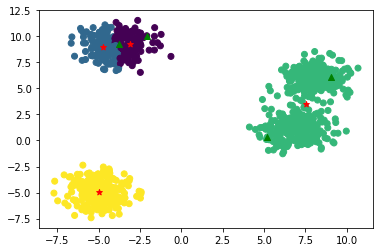

In [9]:
# Plot: color samples according to cluster
plt.figure()
### BEGIN SOLUTION
cluster_assignments = np.argmax(C, axis=1)
plt.scatter(*X.T, c=cluster_assignments)
plt.scatter(*M.T, c="r", marker="*")
plt.scatter(*M_init.T, c="g", marker="^")
### END SOLUTION
plt.show()

## Number of Clusters
Try out a different number of k and plot the result. Run this for 5 runs to investigate the effect of randomness.

Converged after 7 iterations
Converged after 9 iterations
Converged after 5 iterations
Converged after 9 iterations
Converged after 6 iterations


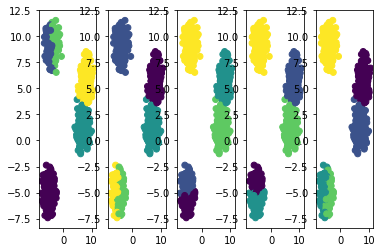

In [10]:
# Run an example
plt.figure()
### BEGIN SOLUTION
k_new = 5
for i in range(5):
    M_init = initialize(k_new, X)
    M, C = kmeans(X, k_new, M_init, max_iter=10)

    plt.subplot(1, 5, i+1)
    cluster_assignments = np.argmax(C, axis=1)
    plt.scatter(*X.T, c=cluster_assignments)
### END SOLUTION
plt.show()

## Initialization
Try out the different initialization methods (3 runs each to investigate the effect of randomness). Comment on the results.

Converged after 4 iterations


/home/postskript/anaconda3/envs/pyml/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


Converged after 4 iterations
Converged after 6 iterations
Converged after 4 iterations
Converged after 4 iterations


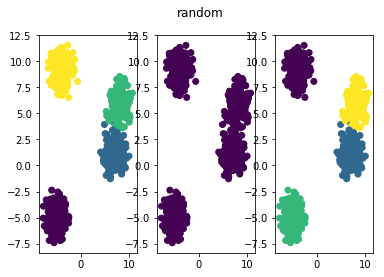

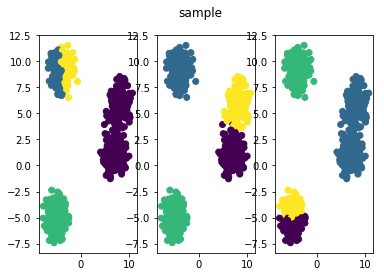

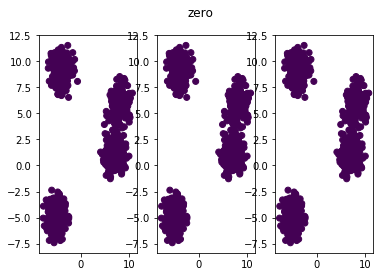

In [11]:
k = 4
num_runs = 3

### BEGIN SOLUTION
for init_method in ["random", "sample", "zero"]:
    plt.figure()
    for i in range(num_runs):
        M_init = initialize(k, X, init_method)
        M, C = kmeans(X, k, M_init)

        plt.subplot(1, num_runs, i+1)
        cluster_assignments = np.argmax(C, axis=1)
        plt.scatter(*X.T, c=cluster_assignments)
    plt.suptitle(init_method)
### END SOLUTION
plt.show()

Your comment:

## Non-isotropic Clusters
Generate a new dataset where the Gaussians do *not* have the identity matrix as covariance and run the k-means on it. Plot the dataset.

Use the following value:
```
covariance = np.array([
        [2, 3],
        [3, 5]
    ])
```

In [12]:
def generate_data_anisotropic(n, k):
    """
    :param n: Number of samples.
    :param k: Number of clusters.
    :return X: The data points stored in a (n x 2) numpy.ndarray.
    :return centers: The cluster centers stored in a (k x 2) numpy.ndarray.
    """
    ### BEGIN SOLUTION
    covariance = np.array([
        [2, 3],
        [3, 5]
    ])
    clusters = list()
    centers = list()
    for i in range(k):
        center = np.random.randint(-10, 10, 2)
        c = np.random.multivariate_normal(center, covariance, n // k)
        
        clusters.append(c)
        centers.append(center.reshape((1, -1)))
    X = np.concatenate(clusters, axis=0)
    centers = np.concatenate(centers, axis=0)
    ### END SOLUTION
    return X, centers
X_anisotropic, _ = generate_data_anisotropic(1000, 4)

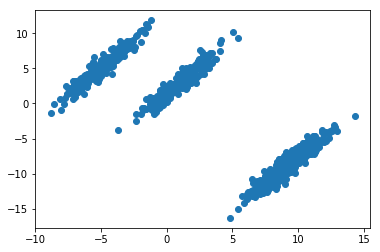

In [13]:
plt.figure()
### BEGIN SOLUTION
plt.scatter(*X_anisotropic.T)
### END SOLUTION
plt.show()

Run k-means for 5 iterations and comment on the result. What problem do you observe? Where does this problem come from? How could this problem be solved?

/home/postskript/anaconda3/envs/pyml/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


Converged after 8 iterations


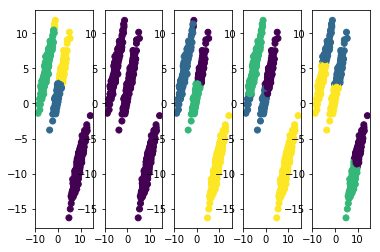

In [14]:
# Run an example
plt.figure()
### BEGIN SOLUTION
for i in range(5):
    M_init = initialize(k, X)
    M, C = kmeans(X_anisotropic, k, M_init, max_iter=10)

    plt.subplot(1, 5, i+1)
    cluster_assignments = np.argmax(C, axis=1)
    plt.scatter(*X_anisotropic.T, c=cluster_assignments)
### END SOLUTION
plt.show()

Your comment: